In [1]:
from scipy.io import loadmat
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import xarray as xr
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmoocean as cmo
import warnings
from wim_dateTime import createListDateTime
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
import os
import glob
import matplotlib.colors as colors

def convertEgg2Num_FSD(fsd_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=fsd_egg.where(fsd_egg<99).values
    sic_num[sic_num==22]=1.65
    sic_num[sic_num==1]=1
    sic_num[sic_num==2]=10
    sic_num[sic_num==3]=60
    sic_num[sic_num==4]=300
    sic_num[sic_num==5]=1250
    sic_num[sic_num==6]=6000
    sic_num[sic_num==7]=15000
    sic_num[sic_num==8]=np.nan
    sic_num[sic_num==9]=0
    sic_num[sic_num==10]=0
    sic_num[sic_num==21]=15000
    return sic_num.astype(float)


def convertEgg2Num_SIC(sic_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=sic_egg.where(sic_egg<99).values
    sic_num[sic_num==92]=10
    sic_num[sic_num==91]=9.5
    sic_num[sic_num==90]=9
    sic_num[sic_num==89]=8.5
    sic_num[sic_num==81]=9
    sic_num[sic_num==80]=8
    sic_num[sic_num==79]=8
    sic_num[sic_num==78]=7.5
    sic_num[sic_num==70]=7
    sic_num[sic_num==68]=7
    sic_num[sic_num==67]=6.5
    sic_num[sic_num==57]=6
    sic_num[sic_num==56]=5.5
    sic_num[sic_num==46]=5
    sic_num[sic_num==45]=4.5
    sic_num[sic_num==35]=4
    sic_num[sic_num==34]=3.5
    sic_num[sic_num==24]=3
    sic_num[sic_num==23]=2.5
    sic_num[sic_num==13]=2
    sic_num[sic_num==12]=1.5
    sic_num[sic_num==60]=6
    sic_num[sic_num==50]=5
    sic_num[sic_num==40]=4
    sic_num[sic_num==30]=3
    sic_num[sic_num==20]=2
    sic_num[sic_num==10]=1
    sic_num[sic_num==98]=0
    sic_num[sic_num==2]=0.1
    sic_num[sic_num==1]=0.1
    sic_num[sic_num<=0]=0

    return sic_num.astype(float)/10


def convertEgg2Num_ITD(sic_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=sic_egg.where(sic_egg<99).values
    sic_num[sic_num==80]=0
    sic_num[sic_num==90]=np.nan
    sic_num[sic_num==92]=np.nan
    sic_num[sic_num==98]=0
    sic_num[sic_num==81]=5
    sic_num[sic_num==82]=5
    sic_num[sic_num==83]=20
    sic_num[sic_num==84]=12.5
    sic_num[sic_num==85]=22.5
    sic_num[sic_num==87]=50
    sic_num[sic_num==88]=40
    sic_num[sic_num==89]=60
    sic_num[sic_num==91]=95
    sic_num[sic_num==93]=200
    sic_num[sic_num==94]=150
    sic_num[sic_num==95]=300
    sic_num[sic_num==96]=250
    sic_num[sic_num==97]=350
    
    return sic_num.astype(float)

def readCryoSatFiles(list_file_N7, list_file_C2):
    #Nimbus-7000 stuff
    listN7=[]
    listC2=[]
    stdN7=[]
    stdC2=[]
    indexF=0
    for file_N7 in list_file_N7:
        fileC2=list_file_C2[indexF]
        dx_obs_fsd=np.squeeze(xr.open_dataset(fileC2))
        dx_obs=np.squeeze(xr.open_dataset(file_N7))
        tempN7=np.squeeze(dx_obs.F17_ICECON) 
        listN7.append(tempN7)
        tempC2=np.squeeze(dx_obs_fsd.fsdrad)*2
        listC2.append(tempC2)
        
#         mask_1 = np.logical_or(tempN7.values > 1, tempN7.values < 0.15)
#         mask_3 = np.logical_or(tempN7.values > 1, tempN7.values > 0.8)
#         mask_4 = np.logical_or(tempN7.values > 1, tempN7.values > 0.9)
#         mask_2 = np.logical_or(tempC2>300, tempC2==300)   
    
#         area_fsd_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_2+mask_lab+mask_lab2)
#         area_aice_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_3+mask_lab+mask_lab2)
        
#         stdN7.append(np.sum(np.sum(area_aice_y, axis=0))/1e12)
#         stdC2.append(np.sum(np.sum(area_fsd_y, axis=0))/1e12)
        
#         indexF=indexF+1

#     std_aice=np.nanstd(np.array(stdN7))
#     std_fsd=np.nanstd(np.array(stdC2))
# #     MIZ_aice_obs=np.nanmean(np.array(stdN7))
# #     MIZ_fsd_obs=np.nanmean(np.array(stdC2))
    avg_aice_obs=np.nanmean(np.stack(listN7),axis=0)
    avg_fsd_obs=np.nanmean(np.stack(listC2),axis=0)
    return [avg_aice_obs, avg_fsd_obs]

def readIceChartFiles(list_files):
    
    grid_IC='/storage/bward/obs/iceChart/depot.cmc.ec.gc.ca/upload/mrb/caya/area.nc'
    dx_IC=xr.open_dataset(grid_IC)
    dx_IC=dx_IC.AREA
    lat_IC=dx_IC.lat
    lon_IC=dx_IC.lon
    mask_labIC=np.logical_or(lon_IC<=-65, lon_IC>=-43)
    mask_lab2IC=np.logical_or(lat_IC<=45, lat_IC>=72)
    
    listFA=[]
    listFB=[]
    listFC=[]

    listSA=[]
    listSB=[]
    listSC=[]

    listCA=[]
    listCB=[]
    listCC=[]
    listCT=[]

    for file_IC in list_files:
#         print(file_IC)
        ds_temp=xr.open_dataset(file_IC)

        temp_FA=convertEgg2Num_FSD(np.squeeze(ds_temp.FA))
        temp_FB=convertEgg2Num_FSD(np.squeeze(ds_temp.FB))
        temp_FC=convertEgg2Num_FSD(np.squeeze(ds_temp.FC))
        temp_SA=convertEgg2Num_ITD(np.squeeze(ds_temp.SA))
        temp_SB=convertEgg2Num_ITD(np.squeeze(ds_temp.SB))
        temp_SC=convertEgg2Num_ITD(np.squeeze(ds_temp.SC))
        temp_CA=convertEgg2Num_SIC(np.squeeze(ds_temp.CA))
        temp_CB=convertEgg2Num_SIC(np.squeeze(ds_temp.CB))
        temp_CC=convertEgg2Num_SIC(np.squeeze(ds_temp.CC))
        temp_CT=convertEgg2Num_SIC(np.squeeze(ds_temp.CT))

        listFA.append(temp_FA)
        listFB.append(temp_FB)
        listFC.append(temp_FC)
        listSA.append(temp_SA)
        listSB.append(temp_SB)
        listSC.append(temp_SC)
        listCA.append(temp_CA)
        listCB.append(temp_CB)
        listCC.append(temp_CC)
        listCT.append(temp_CT)
           
    FSDA=np.nanmean(np.stack(listFA),axis=0)
    FSDB=np.nanmean(np.stack(listFB),axis=0)
    FSDC=np.nanmean(np.stack(listFC),axis=0)

    ITDA=np.nanmean(np.stack(listSA),axis=0)
    ITDB=np.nanmean(np.stack(listSB),axis=0)
    ITDC=np.nanmean(np.stack(listSC),axis=0)

    SICA=np.nanmean(np.stack(listCA),axis=0)
    SICB=np.nanmean(np.stack(listCB),axis=0)
    SICC=np.nanmean(np.stack(listCC),axis=0)
    SICT=np.nanmean(np.stack(listCT),axis=0)

    SIC=SICA+SICB+SICC
    SIC[SIC<=0]=np.nan

    SICT[SICT<=0.15]=np.nan

    FSD=(SICA/SIC)*FSDA+(SICB/SIC)*FSDB+(SICC/SIC)*FSDC
    
    return [SICT, FSD]

def computeAvgCryoSatIceChart(list_year, list_month):
    globAvg_aiceIC=[]
    globAvg_fsdIC=[]
    globAvg_aiceC2=[]
    globAvg_fsdC2=[]
    path_IC='/storage/bward/obs/iceChart/CIS_10km/'
    path_obs="/storage/bward/obs/nsidc/raw/"
    path_obs_fsd='/storage/bward/obs/cryoSat2/nsidc/'
    
    for mm in list_month:
        if mm != 12:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2018'+str(mm+1).zfill(2)+'0100000.nc'
        else:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2019010100000.nc'

        avg_dMIZ_IC_y=np.array([])
        avg_cMIZ_IC_y=np.array([])
        avg_dMIZ_C2_y=np.array([])
        avg_cMIZ_C2_y=np.array([])
        
#         #Create a list of file to read for each obs dataset
        for yyyy in list_year:
            list_file_IC=[]
            list_file_N7=[]
            list_file_C2=[]
            file_pattern_N7="NSIDC0051_SEAICE_PS_N25km_"+str(yyyy)+str(mm).zfill(2)+"_v2.0.nc"
            filePath_N7=os.path.join(path_obs, file_pattern_N7)
            tempFileN7=glob.glob(filePath_N7)

            file_pattern_C2="cryosat_fsd_"+str(yyyy)+str(mm).zfill(2)+"_nsidc.nc"
            filePath_C2=os.path.join(path_obs_fsd, file_pattern_C2)
            tempFileC2=glob.glob(filePath_C2)

            file_pattern_IC='CIS_10km_'+str(yyyy)+str(mm).zfill(2)+'*'+'.nc'
            filePath_IC=os.path.join(path_IC, file_pattern_IC)
            tempFileL=glob.glob(filePath_IC)

            for f in tempFileL:
                list_file_IC.append(f)

            for fN7 in tempFileN7:
                list_file_N7.append(fN7)

            for fC2 in tempFileC2:
                list_file_C2.append(fC2)
                
            #Read obs, and compute MIZ each year
            [mean_aice_IC,mean_fsd_IC]=readIceChartFiles(list_file_IC)
#             [cMIZ_IC_y, dMIZ_IC_y]=computeMIZ_IC(mean_aice_IC, mean_fsd_IC)
            
            [mean_aice_C2,mean_fsd_C2]=readCryoSatFiles(list_file_N7, list_file_C2)
        
            globAvg_aiceIC.append(mean_aice_IC)
            globAvg_fsdIC.append(mean_fsd_IC)
            globAvg_aiceC2.append(mean_aice_C2)
            globAvg_fsdC2.append(mean_fsd_C2)
            
    sic_IC=np.nanmean(np.stack(globAvg_aiceIC),axis=0)
    fsd_IC=np.nanmean(np.stack(globAvg_fsdIC),axis=0)
    sic_C2=np.nanmean(np.stack(globAvg_aiceC2),axis=0)
    fsd_C2=np.nanmean(np.stack(globAvg_fsdC2),axis=0)
    
    return [sic_IC, fsd_IC, sic_C2, fsd_C2]

/tmp/ipykernel_1999513/407184077.py:193: RuntimeWarning: Mean of empty slice
  FSDA=np.nanmean(np.stack(listFA),axis=0)
/tmp/ipykernel_1999513/407184077.py:194: RuntimeWarning: Mean of empty slice
  FSDB=np.nanmean(np.stack(listFB),axis=0)
/tmp/ipykernel_1999513/407184077.py:195: RuntimeWarning: Mean of empty slice
  FSDC=np.nanmean(np.stack(listFC),axis=0)
/tmp/ipykernel_1999513/407184077.py:197: RuntimeWarning: Mean of empty slice
  ITDA=np.nanmean(np.stack(listSA),axis=0)
/tmp/ipykernel_1999513/407184077.py:198: RuntimeWarning: Mean of empty slice
  ITDB=np.nanmean(np.stack(listSB),axis=0)
/tmp/ipykernel_1999513/407184077.py:199: RuntimeWarning: Mean of empty slice
  ITDC=np.nanmean(np.stack(listSC),axis=0)
/tmp/ipykernel_1999513/407184077.py:201: RuntimeWarning: Mean of empty slice
  SICA=np.nanmean(np.stack(listCA),axis=0)
/tmp/ipykernel_1999513/407184077.py:202: RuntimeWarning: Mean of empty slice
  SICB=np.nanmean(np.stack(listCB),axis=0)
/tmp/ipykernel_1999513/407184077.py:203:

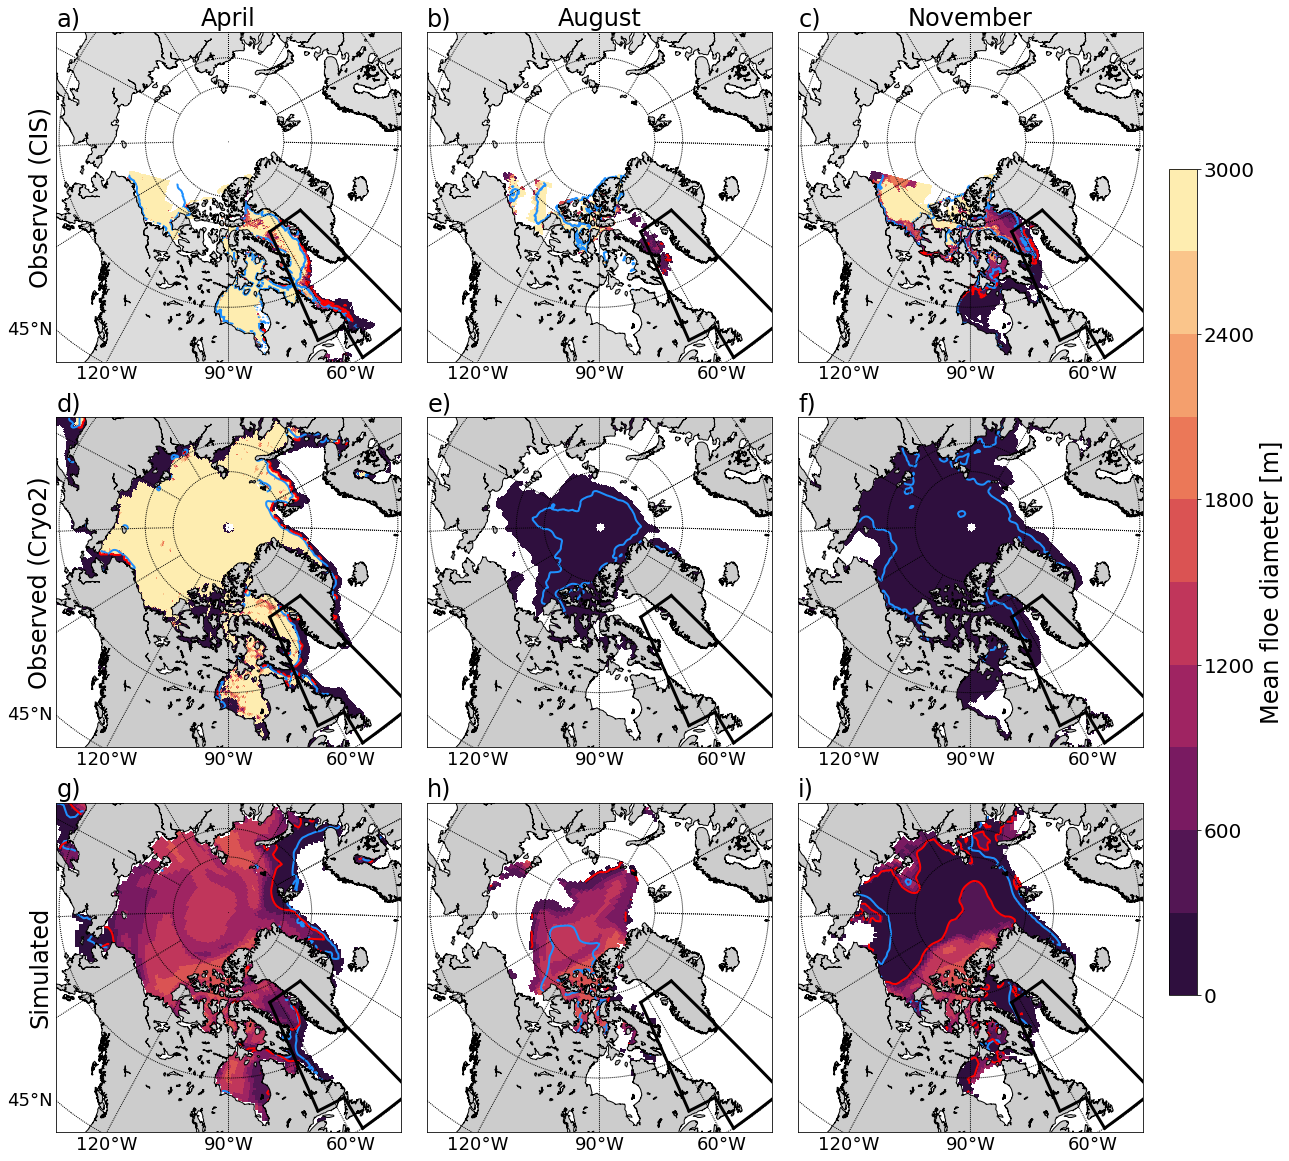

In [2]:
from matplotlib.gridspec import GridSpec
cmap=cmo.matter()
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
bounds=[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000] #, 4500, 4800, 5100, 5400, 5700, 6000] # 1000, 2000, 6000, 10000]
norm= mpl.colors.BoundaryNorm(bounds, cmap.N)


#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
bounds_obs = [x for x in bounds]
norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)

REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
REP_test='/aos/home/bward/wim/post-proc/case86/avg/'
REP_test2='/aos/home/bward/wim/post-proc/case87/avg/'
path_obs="/storage/bward/obs/nsidc/raw/"
path_obs_fsd='/storage/bward/obs/cryoSat2/nsidc/'
coord_obs="/storage/bward/obs/nsidc/NSIDC0771_LatLon_PS_N25km_v1.0.nc"

grid_IC='/storage/bward/obs/iceChart/depot.cmc.ec.gc.ca/upload/mrb/caya/area.nc'
dx_IC=xr.open_dataset(grid_IC)
dx_IC=dx_IC.AREA
lat_IC=dx_IC.lat
lon_IC=dx_IC.lon
mask_labIC=np.logical_or(lon_IC<=-65, lon_IC>=-43)
mask_lab2IC=np.logical_or(lat_IC<=45, lat_IC>=72)

dx_coord_obs=xr.open_dataset(coord_obs)
lat_obs=dx_coord_obs.latitude
lon_obs=dx_coord_obs.longitude
list_year=[2018]
list_month=[4, 8, 11]


fig = plt.figure(figsize=[18, 16])
fig.subplots_adjust(left=0.05, right=0.93, bottom=0.02, top=0.98) 
gs = GridSpec(3,4 , figure=fig, hspace=0.15, wspace=0.1, width_ratios=[1, 1, 1, 0.08])

col=0
for mm in list_month:
    if mm != 12:
        nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2018'+str(mm+1).zfill(2)+'0100000.nc'
    else:
        nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2019010100000.nc'
#     REP_coup='/aos/home/bward/wim/cice/out/case97/history/'
#     nameFile='iceh_avg.2018-01-30.nc'
        
    list_mm=[mm]
    
    [avg_aice_IC, avg_fsd_IC, avg_aice_obs, avg_fsd_obs]=computeAvgCryoSatIceChart(list_year, list_mm)
        
    avg_aice_obs=np.zeros((448, 304))
    avg_fsd_obs=np.zeros((448, 304))
    
    for yyyy in list_year:
        name_obs="NSIDC0051_SEAICE_PS_N25km_"+str(yyyy)+str(mm).zfill(2)+"_v2.0.nc"
        name_obs_fsd="cryosat_fsd_"+str(yyyy)+str(mm).zfill(2)+"_nsidc.nc"
        pathFile_obs=path_obs+name_obs
        pathFile_obs_fsd=path_obs_fsd+name_obs_fsd
        dx_obs=xr.open_dataset(pathFile_obs)
        dx_obs_fsd=xr.open_dataset(pathFile_obs_fsd)
        aice_obs=np.squeeze(dx_obs.F17_ICECON) 
        fsd_obs=np.squeeze(dx_obs_fsd.fsdrad)*2
        fsd_obs=fsd_obs.fillna(0)

        avg_aice_obs=avg_aice_obs+aice_obs
        avg_fsd_obs=avg_fsd_obs+fsd_obs

    avg_aice_obs=avg_aice_obs/len(list_year)
    avg_fsd_obs=avg_fsd_obs/len(list_year)
    
    pathFile_coup=REP_coup+nameFile
    dx_coup = xr.open_dataset(pathFile_coup)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    
    aice=np.squeeze(dx_coup.aice)
    fsd_climo=np.squeeze(dx_coup.fsdrad).where(aice>0.15)
    
    maskMIZ=aice.where(lat>0)
    maskMIZ=maskMIZ.where(aice>0.15)
    maskFSD=maskMIZ.where(fsd_climo<=300)
    maskMIZ=maskMIZ.where(maskMIZ<=0.8)
    
    mask_array_1 = np.logical_or(avg_aice_obs > 1, avg_aice_obs < 0.15)
    mask_array_3 = np.logical_or(avg_aice_obs > 1, avg_aice_obs > 0.8)
    mask_array_4 = np.logical_or(avg_aice_obs > 1, avg_aice_obs > 0.9)
    mask_array_2 = np.logical_or(avg_fsd_obs > 300, avg_fsd_obs == 300)
    
    mask_IC_1 = np.logical_or(avg_aice_IC > 1, avg_aice_IC < 0.15)
    mask_IC_3 = np.logical_or(avg_aice_IC > 1, avg_aice_IC > 0.8)
    mask_IC_4 = np.logical_or(avg_aice_IC > 1, avg_aice_IC > 0.9)
    mask_IC_2 = np.logical_or(avg_fsd_IC > 300, avg_fsd_IC == 300)
    mask_IC_5 = np.logical_or(avg_fsd_IC > 6000, avg_fsd_IC == 6000)
    
    fsd_obs_m=ma.masked_array(np.nan_to_num(avg_fsd_obs), mask=mask_array_1)
    fsd_obs_m2=ma.masked_array(np.nan_to_num(avg_fsd_obs), mask=mask_array_1+mask_array_3)
    maskMIZ_obs=ma.masked_array(avg_aice_obs, mask=mask_array_1+mask_array_3)
    test=ma.masked_array(avg_aice_obs, mask=mask_array_1)
#     maskMIZ_fsd_obs=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_2+mask_array_4)
    
    fsd_IC_m=ma.masked_array(avg_fsd_IC, mask=mask_IC_1)
    fsd_IC_m2=ma.masked_array(avg_fsd_IC, mask=mask_IC_1+mask_IC_3)
    maskMIZ_IC=ma.masked_array(avg_aice_IC, mask=mask_IC_1+mask_IC_3)
    test_IC=ma.masked_array(avg_aice_IC, mask=mask_IC_1)
    
#     maskMIZ_fsd_IC=ma.masked_array(avg_fsd_IC, mask=mask_IC_1+mask_IC_2+mask_IC_4)
    
    ax1 = fig.add_subplot(gs[0, col])
    plt.sca(ax1)
    m = Basemap(width=7000000, height=6700000, resolution='l', projection='stere', lat_ts=50, lat_0=80, lon_0=-90.)
    x_ic, y_ic = m(lon_IC.values, lat_IC.values)
    sc_ic = m.pcolor(x_ic, y_ic, avg_fsd_IC, norm=norm_obs, cmap=cmap)
    none_map = ListedColormap(['none'])
    cont2 = m.contour(x_ic, y_ic, test_IC, colors='dodgerblue', levels=[0.8], linewidths=2)
    cont2 = m.contour(x_ic, y_ic, fsd_IC_m2, colors='r', levels=[300], linewidths=2)
    
    
#     cont=m.pcolor(x,y, maskFSD, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)
#     cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='// //', edgecolor='dodgerblue', linewidth=0.03, zorder=2)
    m.fillcontinents(color='gainsboro')
    m.drawcoastlines()
#         mask_SL = np.logical_and.reduce((
#     lon_IC >= -75,
#     lon_IC <= -57,
#     lat_IC >= 45,
#     lat_IC <= 51
#     ))
    m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
    m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
    m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
    m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')
    if col == 0:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[1, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax1.set_title('a)', loc='left', fontsize=24)
        ax1.set_ylabel("Observed (CIS)", size=24)
        ax1.set_title('April', loc='center', fontsize=24)
    elif col == 1:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax1.set_title('b)', loc='left', fontsize=24)
        ax1.set_title('August', loc='center', fontsize=24)
    elif col == 2:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax1.set_title('c)', loc='left', fontsize=24)
        ax1.set_title('November', loc='center', fontsize=24)


    ax2 = fig.add_subplot(gs[1, col])

    plt.sca(ax2)
    x_obs, y_obs = m(lon_obs.values, lat_obs.values)
    sc_obs = m.pcolor(x_obs, y_obs, fsd_obs_m, norm=norm_obs, cmap=cmap)
    none_map = ListedColormap(['none'])
    cont2 = m.contour(x_obs, y_obs, test, colors='dodgerblue', levels=[0.8], linewidths=2)
    cont2 = m.contour(x_obs, y_obs, fsd_obs_m2, colors='r', levels=[300], linewidths=2)
#     cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)
#     cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='// //', edgecolor='dodgerblue', linewidth=0.03, zorder=2)

    m.fillcontinents()
    m.drawcoastlines()
    m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
    m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
    m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
    m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')
    if col == 0:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[1, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax2.set_title('d)', loc='left', fontsize=24)
        ax2.set_ylabel("Observed (Cryo2)", size=24)
    elif col == 1:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax2.set_title('e)', loc='left', fontsize=24)
    elif col == 2:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax2.set_title('f)', loc='left', fontsize=24)

    ax3 = fig.add_subplot(gs[2, col])

    plt.sca(ax3)
    x, y = m(lon.values, lat.values)
    sc = m.pcolor(x, y, fsd_climo.values, norm=norm_obs, cmap=cmap)
    none_map = ListedColormap(['none'])
    cont2 = m.contour(x, y, aice.values, colors='dodgerblue', levels=[0.8], linewidths=2)
    cont2 = m.contour(x, y, fsd_climo.values, colors='r', levels=[300], linewidths=2)
#     cont=m.pcolor(x_ic,y_ic, maskMIZ_fsd_IC, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)
#     cont=m.pcolor(x_ic,y_ic, maskMIZ_IC, cmap=none_map, hatch='// //', edgecolor='dodgerblue', linewidth=0.03, zorder=2)

    m.fillcontinents()
    m.drawcoastlines()
    m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
    m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
    m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
    m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
    m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')
    if col == 0:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[1, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax3.set_title('g)', loc='left', fontsize=24)
        ax3.set_ylabel("Simulated", size=24)
    elif col == 1:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax3.set_title('h)', loc='left', fontsize=24)
    elif col == 2:
        m.drawparallels(np.arange(-90., 120., 15.), labels=[0, 0, 0, 0], size=18)
        m.drawmeridians(np.arange(0., 420., 30.), labels=[0, 0, 0, 1], size=18)
        ax3.set_title('i)', loc='left', fontsize=24)

    col += 1

# Add colorbar
cax = fig.add_subplot(gs[:, 3], aspect=30)
cbar = fig.colorbar(sc, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=20)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Mean floe diameter [m]', size=24)
plt.savefig('figures/panarc_floesize_mar_aug_nov_CIS_Cryo2_CTL.pdf',dpi=1200,format='pdf',metadata=None, bbbox_inches=None)
# plt.savefig('panarc_floesize_mar_aug_nov_CIS_Cryo2_CTL',dpi='figure',format='png',metadata=None, bbbox_inches=None)
# plt.show()

In [3]:
cmap=cmo.matter()
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
bounds=[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300,3600] #, 4500, 4800, 5100, 5400, 5700, 6000] # 1000, 2000, 6000, 10000]
norm= mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_obs = [x for x in bounds]
norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)


REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
REP_test='/aos/home/bward/wim/post-proc/case86/avg/'
REP_test2='/aos/home/bward/wim/post-proc/case87/avg/'
path_obs="/storage/bward/obs/nsidc/raw/"
path_obs_fsd='/storage/bward/obs/cryoSat2/nsidc/'
coord_obs="/storage/bward/obs/nsidc/NSIDC0771_LatLon_PS_N25km_v1.0.nc"
path_IC='/storage/bward/obs/iceChart/CIS_10km/'
dx_coord_obs=xr.open_dataset(coord_obs)
lat_obs=dx_coord_obs.latitude
lon_obs=dx_coord_obs.longitude
# list_year=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
list_year=[2018]
list_month=[3]

col=0
for mm in list_month:
    if mm != 12:
        nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2018'+str(mm+1).zfill(2)+'0100000.nc'
    else:
        nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2019010100000.nc'
        
    #Create a list of file to read for each dataset
    list_file_IC=[]
    list_file_N7=[]
    list_file_C2=[]
    for yyyy in list_year:
        file_pattern_N7="NSIDC0051_SEAICE_PS_N25km_"+str(yyyy)+str(mm).zfill(2)+"_v2.0.nc"
        filePath_N7=os.path.join(path_obs, file_pattern_N7)
        tempFileN7=glob.glob(filePath_N7)
        
        file_pattern_C2="cryosat_fsd_"+str(yyyy)+str(mm).zfill(2)+"_nsidc.nc"
        filePath_C2=os.path.join(path_obs_fsd, file_pattern_C2)
        tempFileC2=glob.glob(filePath_C2)
        
        file_pattern_IC='CIS_10km_'+str(yyyy)+str(mm).zfill(2)+'*'+'.nc'
        filePath_IC=os.path.join(path_IC, file_pattern_IC)
        tempFileL=glob.glob(filePath_IC)
        
        for f in tempFileL:
            list_file_IC.append(f)
            
        for fN7 in tempFileN7:
            list_file_N7.append(fN7)
            
        for fC2 in tempFileC2:
            list_file_C2.append(fC2)
                
    #Read model and create mask
    pathFile_coup=REP_coup+nameFile
    dx_coup = xr.open_dataset(pathFile_coup)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    
    ds_IC=xr.open_dataset(list_file_IC[0])
    lon_IC=np.squeeze(ds_IC.lon).values
    lat_IC=np.squeeze(ds_IC.lat).values

    aice=np.squeeze(dx_coup.aice)
    fsd_climo=np.squeeze(dx_coup.fsdrad).where(aice>0.15)
    wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
    
    maskMIZ=aice.where(np.logical_or(np.logical_or(lat<=45, lat>=51), np.logical_or(lon<=360-75, lon>=360-57)))
#     maskMIZ=aice.where(lat>0)
#     maskMIZ=maskMIZ.where(aice>0.15)
#     maskfrac=maskMIZ.where(wave_frac>0)
#     maskFSD=maskMIZ.where(fsd_climo<=300)
#     maskMIZ=maskMIZ.where(maskMIZ<=0.8)
        
    #Read Cryosat and Nimbus-7 and create mask
    listC2=[]
    for file_C2 in list_file_C2:
        dx_obs_fsd=xr.open_dataset(file_C2)
        tempC2=np.nan_to_num(np.squeeze(dx_obs_fsd.fsdrad)*2)
        listC2.append(tempC2)
    
    #Nimbus-7000 stuff
    listN7=[]
    for file_N7 in list_file_N7:
        dx_obs=xr.open_dataset(file_N7)
        tempN7=np.squeeze(dx_obs.F17_ICECON) 
        listN7.append(tempN7)
        
    avg_aice_obs=np.nanmean(np.stack(listN7),axis=0)
    avg_fsd_obs=np.nanmean(np.stack(listC2),axis=0)
    
    mask_array_1 = np.logical_or(avg_aice_obs > 1, avg_aice_obs< 0.15)
    mask_array_3 = np.logical_or(avg_aice_obs > 1, avg_aice_obs > 0.8)
    mask_array_4 = np.logical_or(avg_aice_obs > 1, avg_aice_obs > 0.8)
    mask_array_2 = np.logical_or(avg_fsd_obs>300, avg_fsd_obs==300)
    
    mask_SL = np.logical_and.reduce((
    lon_obs >= -75,
    lon_obs <= -57,
    lat_obs >= 45,
    lat_obs <= 51
    ))
    

    fsd_obs_m=ma.masked_array(avg_fsd_obs, mask=mask_array_1)
    fsd_obs_m2=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_4)
    maskMIZ_obs=ma.masked_array(avg_aice_obs, mask=mask_array_1+mask_array_3)
    test=ma.masked_array(avg_aice_obs, mask=mask_array_1)
    
    maskMIZ_fsd_obs=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_2+mask_array_4)
    
    # ---- Read Ice Chart and create mask ------ # 
    IC_data=readIceChartFiles(list_file_IC) 
    FSD=IC_data[1]
    SICT=IC_data[0]
    
    mask_IC1 = np.logical_or(SICT>1, SICT<0.15)
    mask_IC2 = np.logical_or(FSD<0, FSD>300)
    mask_IC3 = np.logical_or(SICT>1, SICT>0.8)
    mask_IC4 = np.logical_or(SICT>1, SICT>0.9)
    mask_IC5 = np.logical_or(FSD<0, FSD<-10)
    
    mask_SL = np.logical_and.reduce((
    lon_IC >= -75,
    lon_IC <= -57,
    lat_IC >= 45,
    lat_IC <= 51
    ))
    
    FSD_IC=ma.masked_array(FSD, mask=mask_IC1+mask_IC5)
    SICT_test=ma.masked_array(SICT, mask=mask_IC1+mask_IC3)
    FSD_test=ma.masked_array(FSD, mask=mask_IC1+mask_IC3)
    SICT_IC=ma.masked_array(SICT, mask=mask_IC1+mask_IC4)

    m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
                lat_ts=50,lat_0=58,lon_0=-55.)
    # m = Basemap(width=4000000,height=4000000, resolution='l',projection='stere',\
    #             lat_ts=50,lat_0=58,lon_0=-55.)

    x_IC,y_IC = m(lon_IC, lat_IC) 

/tmp/ipykernel_1999513/407184077.py:193: RuntimeWarning: Mean of empty slice
  FSDA=np.nanmean(np.stack(listFA),axis=0)
/tmp/ipykernel_1999513/407184077.py:194: RuntimeWarning: Mean of empty slice
  FSDB=np.nanmean(np.stack(listFB),axis=0)
/tmp/ipykernel_1999513/407184077.py:195: RuntimeWarning: Mean of empty slice
  FSDC=np.nanmean(np.stack(listFC),axis=0)
/tmp/ipykernel_1999513/407184077.py:197: RuntimeWarning: Mean of empty slice
  ITDA=np.nanmean(np.stack(listSA),axis=0)
/tmp/ipykernel_1999513/407184077.py:198: RuntimeWarning: Mean of empty slice
  ITDB=np.nanmean(np.stack(listSB),axis=0)
/tmp/ipykernel_1999513/407184077.py:199: RuntimeWarning: Mean of empty slice
  ITDC=np.nanmean(np.stack(listSC),axis=0)
/tmp/ipykernel_1999513/407184077.py:201: RuntimeWarning: Mean of empty slice
  SICA=np.nanmean(np.stack(listCA),axis=0)
/tmp/ipykernel_1999513/407184077.py:202: RuntimeWarning: Mean of empty slice
  SICB=np.nanmean(np.stack(listCB),axis=0)
/tmp/ipykernel_1999513/407184077.py:203:

/tmp/ipykernel_1999513/2726375123.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc = m.pcolor(x, y, fsd_climo.where(maskMIZ>0).values, norm=norm, cmap=cmap)
/tmp/ipykernel_1999513/2726375123.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x_obs, y_obs, fsd_obs_m, norm=norm_obs, cmap=cmap)


/tmp/ipykernel_1999513/2726375123.py:73: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc = m.pcolor(x_IC, y_IC, FSD_IC, norm=norm_obs, cmap=cmap)
/tmp/ipykernel_1999513/2726375123.py:114: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figures/labrador_floesize_MIZ_CIS_Cryo_CTRL_march2018.pdf',dpi=1200,format='pdf',metadata=None, bbbox_inches=None)


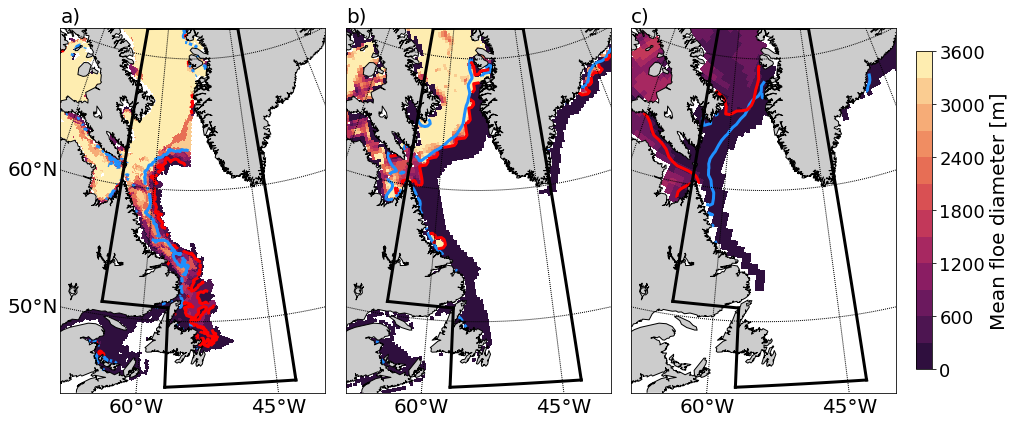

In [4]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=[14, 6])
fig.subplots_adjust(left=0.05, right=0.915, bottom=0.015, top=0.985) 
gs = GridSpec(1,4, figure=fig, hspace=0.15, wspace=0.1, width_ratios=[1, 1, 1, 0.06])

ax1 = fig.add_subplot(gs[0, 2])
plt.sca(ax1)
# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
m = Basemap(width=2250000,height=3100000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58.5,lon_0=-54.)
x,y = m(lon.values, lat.values)
sc = m.pcolor(x, y, fsd_climo.where(maskMIZ>0).values, norm=norm, cmap=cmap)
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
cont2=m.contour(x,y, aice.where(maskMIZ>0).values, colors='dodgerblue', levels=[0.8], linewidths=3)
# cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
#     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
cont2=m.contour(x,y, fsd_climo.where(maskMIZ>0).values, colors='r', levels=[300], linewidths=3)
# cont=m.pcolor(x,y, maskFSD, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.01, zorder=1)
#     cont=m.pcolor(x,y, maskfrac, cmap=none_map, hatch='\\ \\ \\', edgecolor='tab:orange', linewidth=0.01, zorder=1)

m.fillcontinents()
m.drawcoastlines()
m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')
#    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
#     if(len(cont.allsegs) != 1):
#         axes.clabel(cont, fontsize= 12)
# if(len(cont.allsegs) != 1):
#     axes.clabel(cont, fontsize= 12) 
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) # draw meridians

ax2 = fig.add_subplot(gs[0, 1])
plt.sca(ax2)
# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
x_obs,y_obs= m(lon_obs.values, lat_obs.values)
sc_obs = m.pcolor(x_obs, y_obs, fsd_obs_m, norm=norm_obs, cmap=cmap)
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
cont2=m.contour(x_obs,y_obs,test, colors='dodgerblue', levels=[0.8], linewidths=3)
# cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
#     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
cont2=m.contour(x_obs,y_obs, fsd_obs_m2 , colors='r', levels=[300], linewidths=3)
# cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)

m.fillcontinents()
m.drawcoastlines()
#    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
#     if(len(cont.allsegs) != 1):
#         axes.clabel(cont, fontsize= 12)
# if(len(cont.allsegs) != 1):
#     axes.clabel(cont, fontsize= 12) 
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) # draw meridians
m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

ax3=fig.add_subplot(gs[0, 0])
plt.sca(ax3)
x_IC,y_IC = m(lon_IC, lat_IC)
sc = m.pcolor(x_IC, y_IC, FSD_IC, norm=norm_obs, cmap=cmap) 
cont2=m.contour(x_IC,y_IC,SICT_IC, colors='dodgerblue', levels=[0.8], linewidths=3)
cont2=m.contour(x_IC,y_IC,FSD_test, colors='r', levels=[300], linewidths=3)
none_map = ListedColormap(['none'])
# cont=m.pcolor(x_IC,y_IC, FSD_test, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)
# cont=m.pcolor(x_IC,y_IC, SICT_test, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
m.fillcontinents()
m.drawcoastlines()
m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')
m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) 

cax = fig.add_subplot(gs[0,3], aspect=20)
cbar = fig.colorbar(sc, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
#     cb.set_label('Mean floe diameter model [m]', size=20)
#     cb=plt.colorbar(sc_obs, ax=axes[2], shrink=0.35)
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Mean floe diameter [m]', size=20)
ax1.set_title('c)', loc='left', fontsize=20)
ax2.set_title('b)', loc='left', fontsize=20)
ax3.set_title('a)', loc='left', fontsize=20)
#     plt.subplots_adjust(wspace=0.4, hspace=0)
#     plt.tight_layout()

# cb=add_colorbar_outside(sc, axes[0], axes[0])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter model [m]', size=20)

# cb=add_colorbar_outside(sc_obs, axes[1], axes[1])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter obs [m]', size=20)
plt.savefig('figures/labrador_floesize_MIZ_CIS_Cryo_CTRL_march2018.pdf',dpi=1200,format='pdf',metadata=None, bbbox_inches=None)

# plt.savefig('labrador_floesize_MIZ_CIS_Cryo_CTRL_march2018.png',dpi='figure',format='png',metadata=None)

In [5]:

# cmap=cmo.matter()
# #        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 180, 280, 424, 600, 860, 1160, 1500, 2000]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds_obs = [x*10 for x in bounds]
# norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)


# REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'

# nameFile='iceh_avg.2018031500000-2018031600000.nc'
# #     else:
# #         nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
            
# pathFile_coup=REP_coup+nameFile
# dx_coup = xr.open_dataset(pathFile_coup)
# lat=dx_coup.TLAT
# lon=dx_coup.ULON

# aice=np.squeeze(dx_coup.aice)

# # #     test=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
# # #     test=test.where(lat>=0)
# # #     maskMIZ=test.where(test>0)
# maskMIZ=aice.where(lat>0)
# maskMIZ=maskMIZ.where(aice>0.15)
# # #     maskMIZ=maskMIZ.where(maskMIZ<=0.8)

# fsd_climo=np.squeeze(dx_coup.fsdrad).where(maskMIZ>0)

# fig, axes = plt.subplots(1,1,figsize=[32,16])

# plt.sca(axes)
# # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#     lat_ts=50,lat_0=60,lon_0=-55.)

# m.fillcontinents()
# m.drawcoastlines()
# x,y = m(lon.values, lat.values)
# sc = m.pcolor(x, y, fsd_climo.values, norm=norm, cmap=cmap)
# #, norm=norm, cmap=cmap)
# cont=axes.contour(x,y, aice.values, cmap=plt.cm.tab10, levels=[0.15, 0.8], linewidths=2)
# if(len(cont.allsegs) != 1):
#     axes.clabel(cont, fontsize= 12)
# # if(len(cont.allsegs) != 1):
# #     axes.clabel(cont, fontsize= 12)
# m.drawparallels(np.arange(-90.,120.,15.),labels=[1,0,0,0], size=16) # draw parallels
# m.drawmeridians(np.arange(0.,420.,30.),labels=[1,1,1,1], size=16) # draw meridians
# divider = make_axes_locatable(axes)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cb=fig.colorbar(sc, cax=cax)
# cb.ax.tick_params(labelsize=18)
# cb.set_ticks(bounds)
# #cb.set_ticks(bounds)
# cb.set_label('Mean floe diameter model [m]', size=20)
# plt.savefig('model_fsdrad_march201815.png',dpi='figure',format='png',metadata=None, bbbox_inches='tight')
#     #cb.set_ticks(bounds)
    

In [6]:
# def add_colorbar_outside(im,ax,ax2):
#     fig = ax.get_figure()
#     bbox = ax.get_position() 
#     bbox2 = ax2.get_position()
#     #bbox contains the [x0 (left), y0 (bottom), x1 (right), y1 (top)] of the axis.
#     width = 0.02
#     eps = 0.05 #margin between plot and colorbar
#     pad=0.01
#     height=abs(bbox.y0-bbox2.y1)-2*pad
#     # [left most position, bottom position, width, height] of color bar.
#     cax = fig.add_axes([bbox.x1 + eps, bbox.y0+pad, width, height])
#     cbar = fig.colorbar(im, cax=cax)
#     return cbar
    
    
# REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
# REP_IC2='/aos/home/bward/wim/post-proc/case89/avg/'
# path_obs="/storage/bward/obs/nsidc/raw/"
# path_obs_fsd='/storage/bward/obs/cryoSat2/nsidc/'

# list_month=[3, 7, 10]
# # monthsl=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# file_area='/aos/home/bward/wim/cice/out/case74/history/iceh_ic.2005-01-09-43200.nc'
# dx_area = xr.open_dataset(file_area)
# dx_area= dx_area.tarea
# grid_NSIDC='/storage/bward/obs/nsidc/NSIDC0771_CellArea_PS_N25km_v1.0.nc'
# dx_NSIDC=xr.open_dataset(grid_NSIDC)
# dx_NSIDC=dx_NSIDC.cell_area
# coord_obs="/storage/bward/obs/nsidc/NSIDC0771_LatLon_PS_N25km_v1.0.nc"
# dx_coord_obs=xr.open_dataset(coord_obs)
# lat_obs=dx_coord_obs.latitude
# lon_obs=dx_coord_obs.longitude
# mask_labrador= np.logical_or(lon_obs<=-65, lon_obs>=-43)
# mask_labrador2= np.logical_or(lat_obs<=45, lat_obs>=62)

# cmap=cmo.matter()
# #        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
# bounds_obs = list(np.array(bounds)*10)


# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)

# list_year=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


# col=0
# for mm in list_month:
#     fig, list_axes= plt.subplots(1,1,figsize=[14,23])
#     if mm != 12:
#         nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2018'+str(mm+1).zfill(2)+'0100000.nc'
#     else:
#         nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2019010100000.nc'
        
#     avg_aice_obs=np.zeros((448, 304))
#     avg_fsd_obs=np.zeros((448, 304))
    
#     for yyyy in list_year:
#         name_obs="NSIDC0051_SEAICE_PS_N25km_"+str(yyyy)+str(mm).zfill(2)+"_v2.0.nc"
#         name_obs_fsd="cryosat_fsd_"+str(yyyy)+str(mm).zfill(2)+"_nsidc.nc"
#         pathFile_obs=path_obs+name_obs
#         pathFile_obs_fsd=path_obs_fsd+name_obs_fsd
#         dx_obs=xr.open_dataset(pathFile_obs)
#         dx_obs_fsd=xr.open_dataset(pathFile_obs_fsd)
#         aice_obs=np.squeeze(dx_obs.F17_ICECON) 
#         fsd_obs=np.squeeze(dx_obs_fsd.fsdrad)*2
#         fsd_obs=fsd_obs.fillna(0)

#         avg_aice_obs=avg_aice_obs+aice_obs
#         avg_fsd_obs=avg_fsd_obs+fsd_obs

#     avg_aice_obs=avg_aice_obs/len(list_year)
#     avg_fsd_obs=avg_fsd_obs/len(list_year)
#     pathFile_coup=REP_coup+nameFile
#     pathFile_IC2=REP_IC2+nameFile
    
#     dx_coup = xr.open_dataset(pathFile_coup)
#     dx_IC2 = xr.open_dataset(pathFile_IC2)

#     aice=np.squeeze(dx_coup.aice)
#     fsd=np.squeeze(dx_coup.fsdrad)
#     wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
        
#     aice_IC2=np.squeeze(dx_IC2.aice)
#     fsd_IC2=np.squeeze(dx_IC2.fsdrad)
#     wave_frac_IC2=np.squeeze(dx_IC2.dafsd_wave[:,0,:,:])
        
#     lat=dx_coup.TLAT.values
#     lon=dx_coup.TLON.values

#     maskNH=aice.where(lat>=0)
#     maskMIZ=maskNH.where(maskNH>=0.15)
#     maskMIZ=maskMIZ.where(maskMIZ<=0.8)

#     maskNH_fsd=aice.where(lat>=0)
#     maskMIZ_fsd=maskNH_fsd.where(maskNH_fsd>=0.15)
#     maskMIZ_fsd=maskMIZ_fsd.where(fsd<=300)
        
#     maskNH_wave=aice.where(lat>=0)
#     maskMIZ_wave=maskNH_wave.where(maskNH_wave>=0.15)
#     maskMIZ_wave=maskMIZ_wave.where(wave_frac>0)
    
# #     maskMIZ_obs=aice_obs.where(aice_obs>=0.15)
# #     maskMIZ_obs=maskMIZ_obs.where(maskMIZ_obs<=0.8)
# #     fsd_obs2=fsd_obs.fillna(1)
#     mask_array_1 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values < 0.15)
#     mask_array_3 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#     mask_array_2 = np.logical_or(avg_fsd_obs.values>300, avg_fsd_obs.values==300)
    
#     test_fsd=ma.masked_array(avg_fsd_obs, mask=mask_array_1)
#     test_aice=ma.masked_array(np.ones((448, 304)), mask=mask_labrador+mask_labrador2)
    
#     basem = Basemap(projection='npstere', boundinglat=55, lon_0=270, resolution='l')
#     x, y = basem(lon, lat)
#     basem.drawgreatcircle(-75, 45, -43, 45,linewidth=3,color='k')
#     basem.drawgreatcircle(-75, 72, -43, 72,linewidth=3,color='k')
#     basem.drawgreatcircle(-75, 45, -75, 72,linewidth=3,color='k')
#     basem.drawgreatcircle(-43, 45, -43, 72,linewidth=3,color='k')     
#     x_obs,y_obs= basem(lon_obs.values, lat_obs.values)
#     basem.drawcoastlines()
#     basem.fillcontinents()
#     sc = basem.pcolor(x_obs, y_obs, avg_aice_obs)
# #     sc = basem.pcolor(x_obs, y_obs, test_aice, color='k')
#     cb_obs=add_colorbar_outside(sc, list_axes, list_axes)
#     cb_obs.ax.tick_params(labelsize=18)
#     cb_obs.ax.tick_params(labelsize=18)
    